In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML, display

team_colors = {
    'DEN': 'orange', 'SEA': 'green', 'football': 'brown',
    'TB': 'red', 'DAL': 'navy', 'TEN': 'lightblue',
    'NYG': 'blue', 'MIN': 'purple', 'GB': 'green',
    'LV': 'black', 'LAC': 'yellow', 'KC': 'red',
    'ARI': 'darkred', 'JAX': 'teal', 'WAS': 'burgundy',
    'NYJ': 'green', 'BAL': 'purple', 'MIA': 'aqua',
    'NE': 'navy', 'IND': 'blue', 'HOU': 'darkblue',
    'PHI': 'darkgreen', 'DET': 'blue', 'CIN': 'orange',
    'PIT': 'yellow', 'SF': 'red', 'CHI': 'darkorange',
    'CLE': 'brown', 'CAR': 'lightblue', 'NO': 'black',
    'ATL': 'red', 'BUF': 'blue', 'LA': 'blue'
}

class NFLFieldAnimation:
    def __init__(self, df):
        self.df = df
        self.unique_nflids = df[df['nflId'].notna()]['nflId'].unique()
        self.unique_gameids = df['gameId'].unique()
        self.unique_playids = df['playId'].unique()

    def animate_all_players(self, gameId, playId):
        play_data = self.df[(self.df['gameId'] == gameId) & 
                           (self.df['playId'] == playId)].copy()

        if len(play_data) == 0:
            raise ValueError(f"No data found for gameId={gameId}, playId={playId}")

        # Create figure and axis with specific backend
        plt.ioff()  # Turn off interactive mode
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(111)
        
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)
        ax.grid(True)
        ax.set_title(f"All Players and Ball\nGame {gameId}, Play {playId}")
        ax.set_xlabel("Field Length (yards)")
        ax.set_ylabel("Field Width (yards)")

        # Initialize containers for player dots and trails
        player_dots = {}
        player_trails = {}
        player_positions = {}

        # Set up the ball
        ball_data = play_data[play_data['nflId'].isna()].copy()
        ball_x_coords = ball_data['x'].values
        ball_y_coords = ball_data['y'].values
        
        ball_dot, = ax.plot([], [], marker='o', color=team_colors['football'], markersize=10, label='Football')
        ball_trail, = ax.plot([], [], color=team_colors['football'], alpha=0.3)

        # Set up the players
        for nflId in self.unique_nflids:
            player_data = play_data[play_data['nflId'] == nflId]
            if len(player_data) > 0:
                club = player_data['club'].iloc[0]
                color = team_colors.get(club, 'black')
                
                # Store positions
                player_positions[nflId] = {
                    'x': player_data['x'].values,
                    'y': player_data['y'].values
                }
                
                # Create dots and trails
                player_dots[nflId], = ax.plot([], [], color=color, marker='o', markersize=10)
                player_trails[nflId], = ax.plot([], [], color=color, alpha=0.3)

        trail_length = 10

        def init():
            # Initialize ball
            if len(ball_x_coords) > 0:
                ball_dot.set_data([ball_x_coords[0]], [ball_y_coords[0]])
            ball_trail.set_data([], [])
            
            # Initialize players
            for nflId in player_dots:
                x = player_positions[nflId]['x'][0]
                y = player_positions[nflId]['y'][0]
                player_dots[nflId].set_data([x], [y])
                player_trails[nflId].set_data([], [])
            
            return (ball_dot, ball_trail, *player_dots.values(), *player_trails.values())

        def update(frame_idx):
            # Update ball
            ball_dot.set_data([ball_x_coords[frame_idx]], [ball_y_coords[frame_idx]])
            
            start_idx = max(0, frame_idx - trail_length)
            ball_trail.set_data(ball_x_coords[start_idx:frame_idx + 1], 
                              ball_y_coords[start_idx:frame_idx + 1])

            # Update players
            for nflId in player_dots:
                x_coords = player_positions[nflId]['x']
                y_coords = player_positions[nflId]['y']
                
                player_dots[nflId].set_data([x_coords[frame_idx]], [y_coords[frame_idx]])
                
                start_idx = max(0, frame_idx - trail_length)
                player_trails[nflId].set_data(x_coords[start_idx:frame_idx + 1],
                                            y_coords[start_idx:frame_idx + 1])

            return (ball_dot, ball_trail, *player_dots.values(), *player_trails.values())

        anim = FuncAnimation(fig, update,
                           init_func=init,
                           frames=len(ball_data),
                           interval=100,
                           blit=True)
        
        # Save the animation as HTML5 video
        html_animation = HTML(anim.to_jshtml())
        plt.close(fig)  # Close the figure to free memory
        return html_animation

# Example usage
try:
    df = pd.read_csv('tracking_week_1.csv')
    animation = NFLFieldAnimation(df)
    
    # Create and display the animation
    anim_html = animation.animate_all_players(gameId=2022091108, playId=62)
    display(anim_html)

except FileNotFoundError:
    print("Error: tracking_week_1.csv file not found. Please check the file path.")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    import traceback
    traceback.print_exc()

In [2]:
game_ids = df['gameId'].unique()

# Create a DataFrame to display the game IDs more clearly
games_df = pd.DataFrame({'gameId': game_ids})

print("All unique game IDs:")
print(games_df)

All unique game IDs:
        gameId
0   2022091200
1   2022091113
2   2022091108
3   2022091112
4   2022091111
5   2022091110
6   2022091109
7   2022091107
8   2022091106
9   2022091105
10  2022091104
11  2022091103
12  2022091102
13  2022091101
14  2022091100
15  2022090800


In [10]:
# Specify the gameId for which you want to see all the plays
gameId = 2022091200

# Filter the DataFrame for the specified game and get unique playIds
plays_in_game = df[df['gameId'] == gameId]['playId'].unique()

# Create a DataFrame to display the plays more clearly
plays_df = pd.DataFrame({'playId': plays_in_game})

print(f"All unique play IDs in game {gameId}:")
print(plays_df)

All unique play IDs in game 2022091200:
     playId
0        64
1        85
2       109
3       156
4       180
..      ...
107    3747
108    3795
109    3826
110    3980
111    4012

[112 rows x 1 columns]


In [ ]:
# Create and display the animation
anim_html = animation.animate_all_players(gameId=2022091108, playId=62)
display(anim_html)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_distances
from scipy import sparse

from ripser import ripser
from persim import plot_diagrams

In [13]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.spatial.distance import cdist

def calculate_coverage_matrix(df, gameId, playId, frameId, threshold):
    """
    Calculate a sparse distance matrix representing defensive coverage,
    only including distances between players of opposing teams that are
    below a specified threshold.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The tracking data DataFrame
    gameId : int
        The game identifier
    playId : int
        The play identifier
    frameId : int
        The frame identifier
    threshold : float
        Maximum distance to include in the sparse matrix
        
    Returns:
    --------
    scipy.sparse.csr_matrix
        Sparse distance matrix where entries represent coverage relationships
    numpy.ndarray
        Array of player IDs corresponding to matrix rows/columns
    dict
        Dictionary containing team information and matrix indices
    """
    # Filter data for specific game, play and frame
    frame_data = df[(df['gameId'] == gameId) & 
                    (df['playId'] == playId) & 
                    (df['frameId'] == frameId) &
                    df['nflId'].notna()]  # Exclude the ball
    
    if len(frame_data) == 0:
        raise ValueError(f"No data found for gameId={gameId}, playId={playId}, frameId={frameId}")
    
    # Print diagnostic information
    print(f"Found {len(frame_data)} players in frame")
    print("Team distribution:")
    print(frame_data['club'].value_counts())
    
    # Get unique teams
    teams = frame_data['club'].unique()
    if len(teams) != 2:
        raise ValueError(f"Expected 2 teams, found {len(teams)}: {teams}")
    
    # Split data by team
    team1_data = frame_data[frame_data['club'] == teams[0]]
    team2_data = frame_data[frame_data['club'] == teams[1]]
    
    print(f"\nTeam {teams[0]}: {len(team1_data)} players")
    print(f"Team {teams[1]}: {len(team2_data)} players")
    
    # Extract positions and IDs for each team
    team1_positions = team1_data[['x', 'y']].values
    team2_positions = team2_data[['x', 'y']].values
    
    team1_ids = team1_data['nflId'].values
    team2_ids = team2_data['nflId'].values
    
    # Calculate distances between teams
    distances = cdist(team1_positions, team2_positions)
    
    # Create mask for distances below threshold
    mask = distances <= threshold
    num_connections = mask.sum()
    
    print(f"\nFound {num_connections} connections with threshold {threshold} yards")
    if num_connections == 0:
        print("\nMinimum distance between players:", distances.min())
        print("Maximum distance between players:", distances.max())
        print("Mean distance between players:", distances.mean())
        print("\nConsider increasing the threshold value")
    
    # Create sparse matrix
    rows, cols = np.where(mask)
    values = distances[mask]
    
    # Create full-size sparse matrix
    n_total = len(team1_ids) + len(team2_ids)
    sparse_distances = csr_matrix((values, 
                                 (rows, cols + len(team1_ids))),
                                shape=(n_total, n_total))
    
    # Make matrix symmetric
    sparse_distances = sparse_distances + sparse_distances.T
    
    # Combine player IDs and create team mapping
    all_player_ids = np.concatenate([team1_ids, team2_ids])
    team_info = {
        'team1': {
            'name': teams[0],
            'player_ids': team1_ids,
            'indices': np.arange(len(team1_ids))
        },
        'team2': {
            'name': teams[1],
            'player_ids': team2_ids,
            'indices': np.arange(len(team1_ids), n_total)
        }
    }
    
    return sparse_distances, all_player_ids, team_info

def analyze_coverage_matrix(sparse_matrix, team_info):
    """
    Analyze the coverage matrix to provide useful statistics about defensive coverage.
    
    Parameters:
    -----------
    sparse_matrix : scipy.sparse.csr_matrix
        The sparse coverage matrix
    team_info : dict
        Dictionary containing team information and matrix indices
        
    Returns:
    --------
    dict
        Dictionary containing various statistics about the coverage
    """
    team1_indices = team_info['team1']['indices']
    team2_indices = team_info['team2']['indices']
    
    # Get the coverage submatrix (team1 -> team2)
    coverage_matrix = sparse_matrix[team1_indices, :][:, team2_indices].toarray()
    
    stats = {
        'num_coverage_relationships': int((coverage_matrix > 0).sum()),
        'min_coverage_distance': float(sparse_matrix.data.min()) if sparse_matrix.nnz > 0 else None,
        'max_coverage_distance': float(sparse_matrix.data.max()) if sparse_matrix.nnz > 0 else None,
        'mean_coverage_distance': float(sparse_matrix.data.mean()) if sparse_matrix.nnz > 0 else None,
        'team1_coverage_stats': {
            'min_players_covered': int((coverage_matrix > 0).sum(axis=1).min()),
            'max_players_covered': int((coverage_matrix > 0).sum(axis=1).max()),
            'mean_players_covered': float((coverage_matrix > 0).sum(axis=1).mean())
        },
        'team2_coverage_stats': {
            'min_covering_players': int((coverage_matrix > 0).sum(axis=0).min()),
            'max_covering_players': int((coverage_matrix > 0).sum(axis=0).max()),
            'mean_covering_players': float((coverage_matrix > 0).sum(axis=0).mean())
        }
    }
    
    return stats

# Example usage with better error handling:
def analyze_play_coverage(df, gameId, playId, frameId, threshold):
    """
    Analyze coverage for a specific play with better error handling.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The tracking data DataFrame
    gameId : int
        The game identifier
    playId : int
        The play identifier
    frameId : int
        The frame identifier
    threshold : float
        Maximum distance to include in the sparse matrix
    """
    try:
        sparse_matrix, player_ids, team_info = calculate_coverage_matrix(
            df, gameId=gameId, playId=playId, frameId=frameId, threshold=threshold
        )
        
        stats = analyze_coverage_matrix(sparse_matrix, team_info)
        
        print("\nCoverage Analysis:")
        print(f"Number of coverage relationships: {stats['num_coverage_relationships']}")
        
        if stats['mean_coverage_distance'] is not None:
            print(f"Average coverage distance: {stats['mean_coverage_distance']:.2f} yards")
        else:
            print("No coverage relationships found within the threshold distance")
            
        return sparse_matrix, player_ids, team_info, stats
        
    except Exception as e:
        print(f"Error analyzing play: {str(e)}")
        return None, None, None, None

Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 23 connections with threshold 5 yards

Coverage Analysis:
Number of coverage relationships: 23
Average coverage distance: 3.19 yards


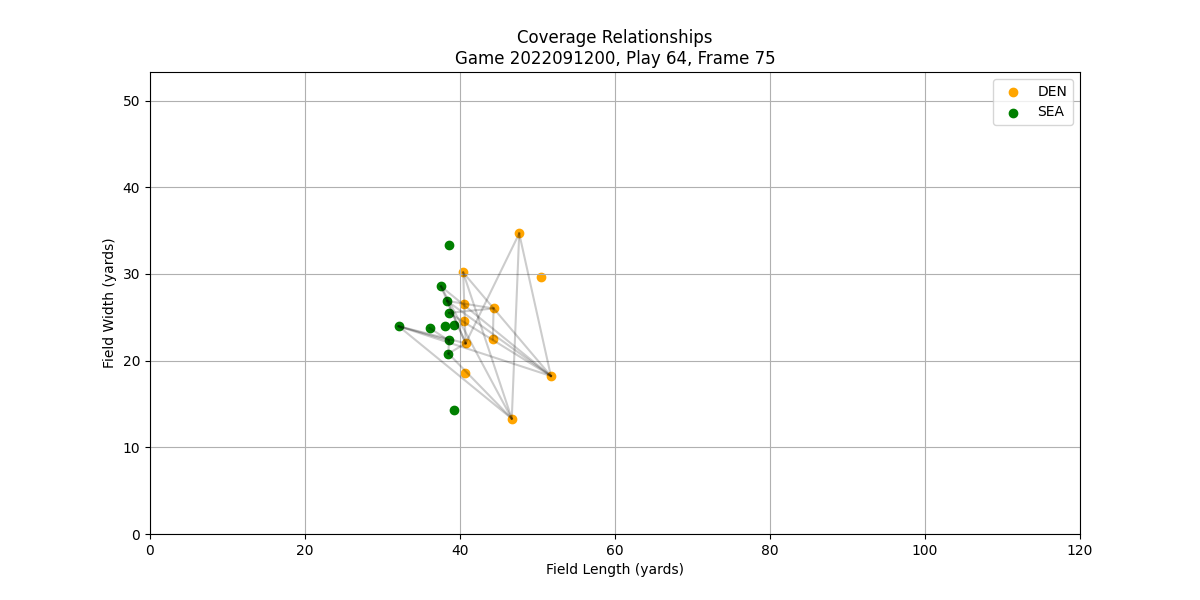

In [23]:
# Example usage with diagnostics
threshold = 5  # Start with 5 yards and adjust based on output
sparse_matrix, player_ids, team_info, stats = analyze_play_coverage(
    df, gameId=2022091200, playId=64, frameId=67, threshold=threshold
)

if sparse_matrix is not None and stats['num_coverage_relationships'] > 0:
    # Only create visualization if we have coverage relationships
    fig = visualize_coverage(sparse_matrix, team_info, df, 
                           gameId=2022091200, playId=64, frameId=75)
    plt.show()

In [16]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import networkx as nx

def visualize_vietoris_rips(df, gameId, playId, frameId, threshold, max_dimension=1):
    """
    Visualize the Vietoris-Rips complex for a specific frame of play.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The tracking data DataFrame
    gameId : int
        The game identifier
    playId : int
        The play identifier
    frameId : int
        The frame identifier
    threshold : float
        Maximum distance to include in the complex
    max_dimension : int
        Maximum homology dimension to compute (default=1)
        
    Returns:
    --------
    tuple
        (figure with VR complex, figure with persistence diagram)
    """
    # Get the coverage matrix and team info
    sparse_matrix, player_ids, team_info = calculate_coverage_matrix(
        df, gameId, playId, frameId, threshold
    )
    
    # Get player positions for this frame
    frame_data = df[(df['gameId'] == gameId) & 
                    (df['playId'] == playId) & 
                    (df['frameId'] == frameId) &
                    df['nflId'].notna()]
    
    # Create position array maintaining team order
    positions = frame_data[['x', 'y']].values
    
    # Calculate persistence diagrams
    diagrams = ripser(sparse_matrix.toarray(), distance_matrix=True, maxdim=max_dimension)['dgms']
    
    # Create figure for VR complex visualization
    fig_complex, ax_complex = plt.subplots(figsize=(12, 6))
    
    # Draw players
    for team_key in ['team1', 'team2']:
        team_name = team_info[team_key]['name']
        team_indices = team_info[team_key]['indices']
        team_positions = positions[team_indices]
        
        ax_complex.scatter(team_positions[:, 0], team_positions[:, 1],
                         label=team_name, color=team_colors.get(team_name, 'black'))
    
    # Draw edges (1-simplices)
    rows, cols = sparse_matrix.nonzero()
    for i, j in zip(rows, cols):
        if i < j:  # Only draw each edge once
            pos1 = positions[i]
            pos2 = positions[j]
            ax_complex.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 
                          'k-', alpha=0.3, linewidth=1)
    
    # Set up the football field view
    ax_complex.set_xlim(0, 120)
    ax_complex.set_ylim(0, 53.3)
    ax_complex.grid(True)
    ax_complex.set_title(f"Vietoris-Rips Complex (ε={threshold})\n"
                        f"Game {gameId}, Play {playId}, Frame {frameId}")
    ax_complex.set_xlabel("Field Length (yards)")
    ax_complex.set_ylabel("Field Width (yards)")
    ax_complex.legend()
    
    # Create persistence diagram
    fig_persist = plt.figure(figsize=(8, 8))
    plot_diagrams(diagrams, show=False)
    plt.title("Persistence Diagram")
    
    return fig_complex, fig_persist

def analyze_topology(df, gameId, playId, frameId, threshold, max_dimension=1):
    """
    Analyze the topological features of the coverage complex.
    
    Parameters:
    -----------
    (same as visualize_vietoris_rips)
    
    Returns:
    --------
    dict
        Dictionary containing topological statistics
    """
    sparse_matrix, player_ids, team_info = calculate_coverage_matrix(
        df, gameId, playId, frameId, threshold
    )
    
    # Calculate persistence diagrams
    results = ripser(sparse_matrix.toarray(), distance_matrix=True, maxdim=max_dimension)
    diagrams = results['dgms']
    
    # Calculate topological statistics
    stats = {
        'betti_numbers': [],
        'persistence_lengths': [],
        'total_persistence': 0
    }
    
    for dim, diagram in enumerate(diagrams):
        # Calculate Betti number (number of features that persist to the threshold)
        betti = sum(1 for birth, death in diagram 
                   if birth <= threshold and (death > threshold or np.isinf(death)))
        stats['betti_numbers'].append(betti)
        
        # Calculate persistence lengths
        persistence = [death - birth for birth, death in diagram if not np.isinf(death)]
        if persistence:
            stats['persistence_lengths'].append(persistence)
            stats['total_persistence'] += sum(persistence)
    
    return stats

def visualize_coverage_evolution(df, gameId, playId, frame_range, threshold, interval=5):
    """
    Create an animation of how the coverage complex evolves over time.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The tracking data DataFrame
    gameId : int
        The game identifier
    playId : int
        The play identifier
    frame_range : tuple
        (start_frame, end_frame) to analyze
    threshold : float
        Maximum distance for the complex
    interval : int
        Number of frames to skip between snapshots
    """
    start_frame, end_frame = frame_range
    frames = range(start_frame, end_frame + 1, interval)
    
    fig = plt.figure(figsize=(15, 5))
    
    for i, frame in enumerate(frames, 1):
        ax = fig.add_subplot(1, len(frames), i)
        
        try:
            sparse_matrix, player_ids, team_info = calculate_coverage_matrix(
                df, gameId, playId, frame, threshold
            )
            
            # Get positions
            frame_data = df[(df['gameId'] == gameId) & 
                          (df['playId'] == playId) & 
                          (df['frameId'] == frame) &
                          df['nflId'].notna()]
            
            positions = frame_data[['x', 'y']].values
            
            # Plot players and edges
            for team_key in ['team1', 'team2']:
                team_name = team_info[team_key]['name']
                team_indices = team_info[team_key]['indices']
                team_positions = positions[team_indices]
                ax.scatter(team_positions[:, 0], team_positions[:, 1],
                          color=team_colors.get(team_name, 'black'), s=30)
            
            # Draw edges
            rows, cols = sparse_matrix.nonzero()
            for i, j in zip(rows, cols):
                if i < j:
                    pos1 = positions[i]
                    pos2 = positions[j]
                    ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 
                           'k-', alpha=0.3, linewidth=1)
            
            ax.set_xlim(0, 120)
            ax.set_ylim(0, 53.3)
            ax.set_title(f"Frame {frame}")
            ax.grid(True)
            
        except Exception as e:
            print(f"Error processing frame {frame}: {str(e)}")
    
    plt.tight_layout()
    return fig

# Example usage:
def analyze_frame_topology(df, gameId, playId, frameId, threshold=5, max_dimension=1):
    """
    Comprehensive analysis of a single frame's topology.
    """
    print(f"\nAnalyzing frame {frameId} with threshold {threshold} yards...")
    
    # Create visualizations
    fig_complex, fig_persist = visualize_vietoris_rips(
        df, gameId, playId, frameId, threshold, max_dimension
    )
    
    # Get topological statistics
    stats = analyze_topology(
        df, gameId, playId, frameId, threshold, max_dimension
    )
    
    print("\nTopological Analysis:")
    print(f"Betti numbers: {stats['betti_numbers']}")
    print(f"Total persistence: {stats['total_persistence']:.2f}")
    
    return fig_complex, fig_persist, stats


Analyzing frame 64 with threshold 5 yards...
Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 24 connections with threshold 5 yards
Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 24 connections with threshold 5 yards

Topological Analysis:
Betti numbers: [1, 0]
Total persistence: 0.00


/home/mauwork/.local/lib/python3.10/site-packages/persim/visuals.py:155: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([x_down, x_up])
/home/mauwork/.local/lib/python3.10/site-packages/persim/visuals.py:156: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([y_down, y_up])


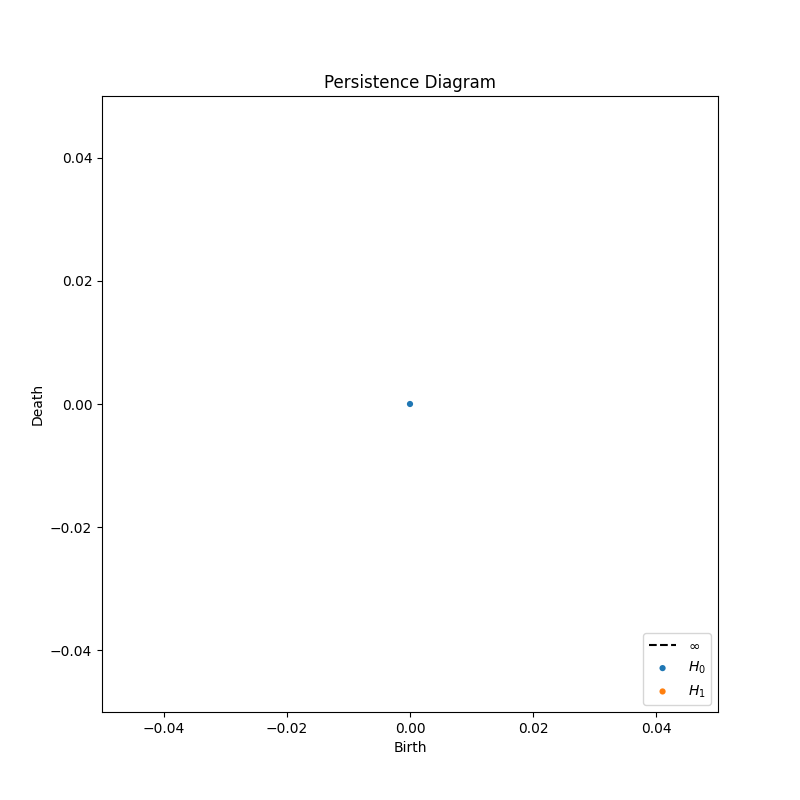

Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 24 connections with threshold 5 yards
Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 23 connections with threshold 5 yards
Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 25 connections with threshold 5 yards
Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 26 connections with threshold 5 yards
Found 22 players in frame
Team distribution:
club
DEN    11
SEA    11
Name: count, dtype: int64

Team DEN: 11 players
Team SEA: 11 players

Found 26 connections with threshold 5 yards


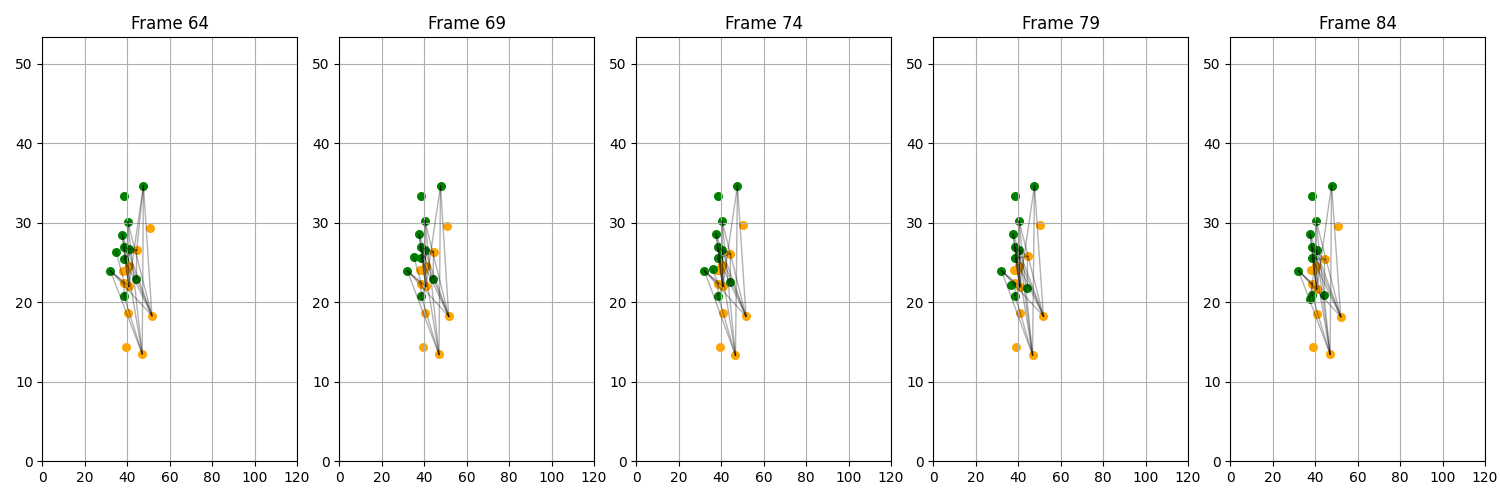

In [20]:
# Analyze a single frame
gameId = 2022091200
playId = 64
frameId = 64
threshold = 5  # Adjust based on your needs

fig_complex, fig_persist, stats = analyze_frame_topology(
    df, gameId, playId, frameId, threshold=threshold
)

# Show the visualizations
plt.show()

# To see the evolution over time
frame_range = (64, 84)  # Adjust range based on your play
fig_evolution = visualize_coverage_evolution(
    df, gameId, playId, frame_range, threshold
)
plt.show()

In [ ]:
##TODO FIX VIETORIS RIPS CONNECTIONS

In [9]:
import pandas as pd
import numpy as np
from scipy.spatial import Delaunay
import gudhi
from sklearn.preprocessing import StandardScaler
import networkx as nx
from typing import List, Tuple, Dict

class CoverageHomologyIndex:
    def __init__(self, min_persistence: float = 0.1, velocity_weight: float = 0.5):
        self.min_persistence = min_persistence
        self.velocity_weight = velocity_weight
        self.scaler = StandardScaler()
        
    def calculate_distance_weighted_persistence(
        self, 
        positions: np.ndarray, 
        hole_center: np.ndarray,
        death_time: float,
        birth_time: float
    ) -> float:
        """
        Calculate the weighted persistence of a coverage hole based on defender distances
        """
        distances = np.linalg.norm(positions - hole_center, axis=1)
        avg_distance = np.mean(distances)
        persistence = death_time - birth_time
        return persistence * avg_distance
    
    def calculate_velocity_adjusted_weight(
        self, 
        velocities: np.ndarray, 
        hole_center: np.ndarray,
        positions: np.ndarray
    ) -> float:
        """
        Adjust hole significance based on defender velocities
        """
        # Calculate vectors from defenders to hole
        directions = hole_center - positions
        
        # Normalize directions
        directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]
        
        # Calculate dot product with velocity vectors to see if defenders are moving toward hole
        velocity_alignments = np.sum(directions * velocities, axis=1)
        
        # Weight is higher if defenders are moving away from hole
        return 1 - np.mean(np.maximum(velocity_alignments, 0))
    
    def calculate_orientation_weight(
        self,
        orientations: np.ndarray,
        positions: np.ndarray,
        hole_center: np.ndarray
    ) -> float:
        """
        Weight holes based on defender orientations
        """
        # Calculate vectors from defenders to hole
        to_hole_vectors = hole_center - positions
        
        # Calculate angles between orientation vectors and vectors to hole
        angles = np.arccos(np.sum(orientations * to_hole_vectors, axis=1) / 
                         (np.linalg.norm(to_hole_vectors, axis=1) + 1e-8))
        
        # Weight is higher if defenders are facing away from hole
        return np.mean(angles) / np.pi
    
    def construct_simplicial_complex(
        self,
        positions: np.ndarray,
        max_radius: float
    ) -> gudhi.SimplexTree:
        """
        Construct a simplicial complex from defender positions
        """
        # Create Vietoris-Rips complex
        rips_complex = gudhi.RipsComplex(points=positions, max_edge_length=max_radius)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        return simplex_tree
    
    def filter_persistence_diagram(
        self,
        diagram: List[Tuple],
        field_position: np.ndarray,
        los_position: float
    ) -> List[Tuple]:
        """
        Filter persistence diagram based on game context
        """
        filtered_diagram = []
        for point in diagram:
            dim, (birth, death) = point
            persistence = death - birth
            
            # Check minimum persistence threshold
            if persistence < self.min_persistence:
                continue
                
            # Check relevance based on field position
            if not self.is_hole_relevant(field_position, los_position):
                continue
                
            filtered_diagram.append(point)
        
        return filtered_diagram
    
    def is_hole_relevant(
        self,
        field_position: np.ndarray,
        los_position: float,
        sideline_threshold: float = 5.0,
        los_threshold: float = 15.0
    ) -> bool:
        """
        Determine if a hole is relevant based on field position
        """
        # Check distance from sidelines
        if abs(field_position[0]) > (53.3 - sideline_threshold):
            return False
            
        # Check distance from line of scrimmage
        if abs(field_position[1] - los_position) > los_threshold:
            return False
            
        return True
    
    def calculate_chi(
        self,
        tracking_data: pd.DataFrame,
        play_type: str
    ) -> Dict:
        """
        Calculate the Coverage Homology Index for a given play
        """
        # Extract defender positions and movements
        defender_positions = tracking_data[tracking_data['position_group'] == 'DEF'][
            ['x', 'y']].values
        defender_velocities = tracking_data[tracking_data['position_group'] == 'DEF'][
            ['speed_x', 'speed_y']].values
        defender_orientations = tracking_data[tracking_data['position_group'] == 'DEF'][
            ['orientation_x', 'orientation_y']].values
        
        # Normalize positions
        defender_positions = self.scaler.fit_transform(defender_positions)
        
        # Construct simplicial complex
        simplex_tree = self.construct_simplicial_complex(
            defender_positions,
            max_radius=2.0 if play_type == 'pass' else 1.5
        )
        
        # Calculate persistence diagram
        persistence = simplex_tree.persistence()
        
        # Filter diagram based on context
        filtered_diagram = self.filter_persistence_diagram(
            persistence,
            field_position=np.mean(defender_positions, axis=0),
            los_position=tracking_data['los'].iloc[0]
        )
        
        # Calculate weighted vulnerabilities for each hole
        vulnerabilities = []
        for point in filtered_diagram:
            dim, (birth, death) = point
            
            # Get hole center by finding all simplices of this dimension
            # and averaging their vertex positions
            simplices = [simplex for simplex, _ in simplex_tree.get_simplices() 
                        if len(simplex) == dim + 1]
            
            if simplices:  # Check if we found any simplices of this dimension
                # Take the first simplex we find for this dimension
                vertices = simplices[0]
                hole_center = np.mean(defender_positions[vertices], axis=0)
            else:
                # If no simplices found, use mean position of all defenders
                hole_center = np.mean(defender_positions, axis=0)
            
            # Calculate various weights
            distance_weight = self.calculate_distance_weighted_persistence(
                defender_positions, hole_center, death, birth)
            velocity_weight = self.calculate_velocity_adjusted_weight(
                defender_velocities, hole_center, defender_positions)
            orientation_weight = self.calculate_orientation_weight(
                defender_orientations, defender_positions, hole_center)
            
            # Combine weights for final vulnerability score
            vulnerability = (
                distance_weight * 
                velocity_weight * 
                orientation_weight
            )
            
            vulnerabilities.append({
                'dimension': dim,
                'birth': birth,
                'death': death,
                'vulnerability': vulnerability,
                'center': hole_center
            })
        
        # Calculate final CHI score
        chi_score = np.sum([v['vulnerability'] for v in vulnerabilities])
        
        return {
            'chi_score': chi_score,
            'vulnerabilities': vulnerabilities,
            'persistence_diagram': filtered_diagram
        }


# Usage example:
def analyze_pre_snap_coverage(tracking_data: pd.DataFrame) -> Dict:
    """
    Analyze pre-snap coverage patterns
    """
    chi = CoverageHomologyIndex(min_persistence=0.15)
    
    # Group tracking data by frame
    frames = tracking_data.groupby('frame_id')
    
    chi_scores = []
    vulnerabilities = []
    
    for frame_id, frame_data in frames:
        result = chi.calculate_chi(frame_data, play_type=frame_data['play_type'].iloc[0])
        chi_scores.append(result['chi_score'])
        vulnerabilities.extend(result['vulnerabilities'])
    
    return {
        'average_chi': np.mean(chi_scores),
        'max_chi': np.max(chi_scores),
        'vulnerability_timeline': vulnerabilities
    }

def predict_route_exploitability(
    chi_results: Dict,
    route_patterns: pd.DataFrame
) -> pd.DataFrame:
    """
    Predict which routes might exploit detected coverage holes
    """
    vulnerabilities = chi_results['vulnerability_timeline']
    
    # Create a spatial index of vulnerabilities
    vulnerability_graph = nx.Graph()
    for i, vuln in enumerate(vulnerabilities):
        vulnerability_graph.add_node(
            i,
            pos=vuln['center'],
            vulnerability=vuln['vulnerability']
        )
    
    # Match routes to vulnerabilities
    route_scores = []
    for _, route in route_patterns.iterrows():
        route_points = route[['x', 'y']].values
        
        # Calculate minimum distance to each vulnerability
        scores = []
        for point in route_points:
            closest_vulnerabilities = sorted(
                vulnerability_graph.nodes(data=True),
                key=lambda x: np.linalg.norm(x[1]['pos'] - point)
            )[:3]
            
            score = sum(v[1]['vulnerability'] / (np.linalg.norm(v[1]['pos'] - point) + 1)
                       for v in closest_vulnerabilities)
            scores.append(score)
        
        route_scores.append({
            'route_id': route['route_id'],
            'exploitability_score': np.mean(scores),
            'max_vulnerability_point': route_points[np.argmax(scores)]
        })
    
    return pd.DataFrame(route_scores)

/tmp/ipykernel_1486/1135955823.py:43: RuntimeWarning: invalid value encountered in divide
  directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]
/tmp/ipykernel_1486/1135955823.py:43: RuntimeWarning: invalid value encountered in divide
  directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]
/tmp/ipykernel_1486/1135955823.py:43: RuntimeWarning: invalid value encountered in divide
  directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]
/tmp/ipykernel_1486/1135955823.py:43: RuntimeWarning: invalid value encountered in divide
  directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]
/tmp/ipykernel_1486/1135955823.py:43: RuntimeWarning: invalid value encountered in divide
  directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]
/tmp/ipykernel_1486/1135955823.py:43: RuntimeWarning: invalid value encountered in divide
  directions = directions / np.linalg.norm(directions, axis=1)[:, np.n

ValueError: alpha (-0.11972553086801858) is outside 0-1 range

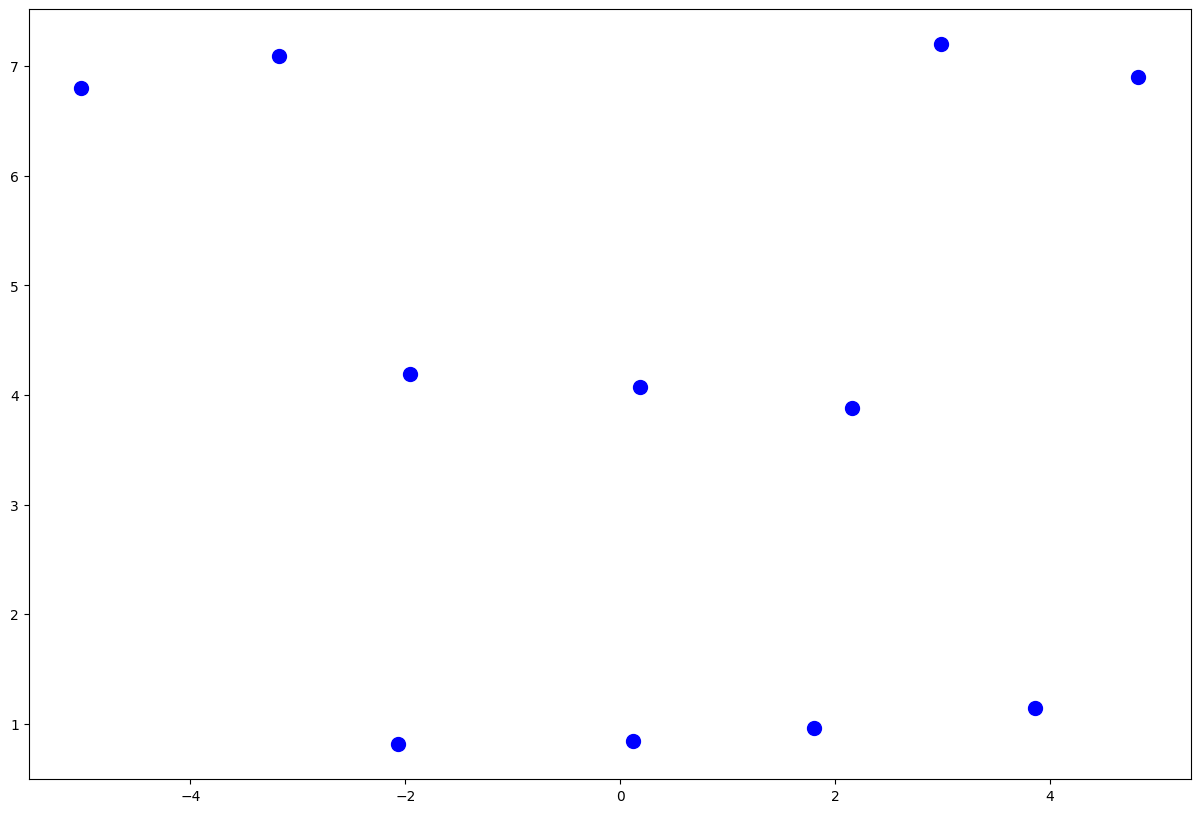

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Arrow
from matplotlib.collections import PatchCollection
import plotly.graph_objects as go
from typing import List, Dict

class CHIVisualizer:
    def __init__(self, field_width=53.3, field_length=100):
        self.field_width = field_width
        self.field_length = field_length
        
    def create_sample_play_data(self, n_defenders=11, n_frames=50):
        """Create sample tracking data for demonstration"""
        play_data = []
        
        # Create defensive formation with some realistic positioning
        base_positions = [
            # Defensive Line
            (0, 1), (-2, 1), (2, 1), (4, 1),
            # Linebackers
            (-2, 4), (0, 4), (2, 4),
            # Secondary
            (-5, 7), (5, 7), (-3, 7), (3, 7)
        ]
        
        for frame in range(n_frames):
            time = frame / 10  # 10 fps
            
            for i, (base_x, base_y) in enumerate(base_positions):
                # Add some motion to make it realistic
                noise_x = np.sin(time + i) * 0.2
                noise_y = np.cos(time + i) * 0.2
                
                # Calculate velocity components
                if frame > 0:
                    vel_x = noise_x - last_x[i]
                    vel_y = noise_y - last_y[i]
                else:
                    vel_x = vel_y = 0
                    last_x = [pos[0] for pos in base_positions]
                    last_y = [pos[1] for pos in base_positions]
                
                # Calculate orientation based on velocity
                orientation = np.arctan2(vel_y, vel_x) if (vel_x != 0 or vel_y != 0) else 0
                
                play_data.append({
                    'frame_id': frame,
                    'nfl_id': f'D{i}',
                    'position_group': 'DEF',
                    'x': base_x + noise_x,
                    'y': base_y + noise_y,
                    'speed_x': vel_x,
                    'speed_y': vel_y,
                    'orientation_x': np.cos(orientation),
                    'orientation_y': np.sin(orientation),
                    'play_type': 'pass',
                    'los': 0
                })
        
        return pd.DataFrame(play_data)

    def visualize_coverage_holes(self, 
                               chi_results: Dict, 
                               frame_data: pd.DataFrame,
                               frame_id: int):
        """Visualize coverage holes and defender positions"""
        plt.figure(figsize=(15, 10))
        
        # Plot defensive players
        defenders = frame_data[frame_data['position_group'] == 'DEF']
        plt.scatter(defenders['x'], defenders['y'], c='blue', s=100, label='Defenders')
        
        # Plot coverage holes
        vulnerabilities = chi_results['vulnerabilities']
        for vuln in vulnerabilities:
            # Size and color based on vulnerability score
            size = vuln['vulnerability'] * 100
            alpha = min(vuln['vulnerability'], 0.7)
            
            circle = Circle(
                vuln['center'],
                radius=np.sqrt(size/np.pi),
                alpha=alpha,
                color='red'
            )
            plt.gca().add_patch(circle)
            
            # Add velocity vectors
            if 'velocity' in vuln:
                plt.arrow(
                    vuln['center'][0],
                    vuln['center'][1],
                    vuln['velocity'][0],
                    vuln['velocity'][1],
                    head_width=0.1,
                    color='green',
                    alpha=0.5
                )
        
        # Add defender orientation arrows
        for _, defender in defenders.iterrows():
            plt.arrow(
                defender['x'],
                defender['y'],
                defender['orientation_x'],
                defender['orientation_y'],
                head_width=0.1,
                color='blue',
                alpha=0.5
            )
        
        plt.title(f'Coverage Analysis - Frame {frame_id}')
        plt.xlabel('Field Width (yards)')
        plt.ylabel('Field Length (yards)')
        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        
        return plt.gcf()

    def create_animated_visualization(self, 
                                   tracking_data: pd.DataFrame, 
                                   chi_timeline: List[Dict]):
        """Create an animated visualization of the coverage analysis"""
        frames = []
        
        for frame_id in tracking_data['frame_id'].unique():
            frame_data = tracking_data[tracking_data['frame_id'] == frame_id]
            frame_chi = next(chi for chi in chi_timeline if chi['frame_id'] == frame_id)
            
            # Create frame visualization
            fig = go.Figure()
            
            # Add defenders
            defenders = frame_data[frame_data['position_group'] == 'DEF']
            fig.add_trace(go.Scatter(
                x=defenders['x'],
                y=defenders['y'],
                mode='markers+text',
                name='Defenders',
                text=defenders['nfl_id'],
                marker=dict(size=12, color='blue')
            ))
            
            # Add coverage holes
            for vuln in frame_chi['vulnerabilities']:
                fig.add_trace(go.Scatter(
                    x=[vuln['center'][0]],
                    y=[vuln['center'][1]],
                    mode='markers',
                    marker=dict(
                        size=vuln['vulnerability'] * 100,
                        color='red',
                        opacity=0.5
                    ),
                    name=f'Vulnerability: {vuln["vulnerability"]:.2f}'
                ))
            
            frames.append(go.Frame(data=fig.data, name=str(frame_id)))
        
        # Create final figure with animation
        fig = go.Figure(
            data=frames[0].data,
            layout=go.Layout(
                updatemenus=[dict(
                    type="buttons",
                    buttons=[dict(
                        label="Play",
                        method="animate",
                        args=[None, {"frame": {"duration": 100, "redraw": True}}]
                    )]
                )],
                xaxis=dict(range=[-10, 10]),
                yaxis=dict(range=[-5, 15])
            ),
            frames=frames
        )
        
        return fig

def main():
    # Create visualizer and sample data
    visualizer = CHIVisualizer()
    sample_data = visualizer.create_sample_play_data()
    
    # Initialize CHI calculator
    chi = CoverageHomologyIndex(min_persistence=0.15)
    
    # Analyze coverage for each frame
    chi_timeline = []
    for frame_id in sample_data['frame_id'].unique():
        frame_data = sample_data[sample_data['frame_id'] == frame_id]
        results = chi.calculate_chi(frame_data, play_type='pass')
        results['frame_id'] = frame_id
        chi_timeline.append(results)
    
    # Create static visualization for a specific frame
    frame_id = 25  # middle of the play
    frame_data = sample_data[sample_data['frame_id'] == frame_id]
    frame_results = next(chi for chi in chi_timeline if chi['frame_id'] == frame_id)
    
    static_fig = visualizer.visualize_coverage_holes(frame_results, frame_data, frame_id)
    static_fig.savefig('coverage_analysis.png')
    
    # Create animated visualization
    animated_fig = visualizer.create_animated_visualization(sample_data, chi_timeline)
    animated_fig.write_html('coverage_animation.html')
    
    # Print summary statistics
    chi_scores = [chi['chi_score'] for chi in chi_timeline]
    print("\nCoverage Analysis Summary:")
    print(f"Average CHI Score: {np.mean(chi_scores):.2f}")
    print(f"Max CHI Score: {np.max(chi_scores):.2f}")
    print(f"Min CHI Score: {np.min(chi_scores):.2f}")
    
    # Create vulnerability heatmap over time
    vulnerability_matrix = np.zeros((len(chi_timeline), 11))  # 11 defenders
    for i, chi in enumerate(chi_timeline):
        for j, vuln in enumerate(chi['vulnerabilities']):
            if j < 11:  # ensure we don't exceed matrix dimensions
                vulnerability_matrix[i, j] = vuln['vulnerability']
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        vulnerability_matrix,
        cmap='YlOrRd',
        xticklabels=[f'Hole {i+1}' for i in range(11)],
        yticklabels=[f'Frame {i}' for i in range(len(chi_timeline))],
        cbar_kws={'label': 'Vulnerability Score'}
    )
    plt.title('Coverage Vulnerability Evolution Over Time')
    plt.xlabel('Coverage Holes')
    plt.ylabel('Frame Number')
    plt.savefig('vulnerability_heatmap.png')

if __name__ == "__main__":
    main()

In [11]:
def calculate_chi(
        self,
        tracking_data: pd.DataFrame,
        play_type: str
    ) -> Dict:
        """
        Calculate the Coverage Homology Index for a given play
        """
        # Extract defender positions and movements
        defender_positions = tracking_data[tracking_data['position_group'] == 'DEF'][
            ['x', 'y']].values
        defender_velocities = tracking_data[tracking_data['position_group'] == 'DEF'][
            ['speed_x', 'speed_y']].values
        defender_orientations = tracking_data[tracking_data['position_group'] == 'DEF'][
            ['orientation_x', 'orientation_y']].values
        
        # Normalize positions
        defender_positions = self.scaler.fit_transform(defender_positions)
        
        # Construct simplicial complex
        simplex_tree = self.construct_simplicial_complex(
            defender_positions,
            max_radius=2.0 if play_type == 'pass' else 1.5
        )
        
        # Calculate persistence diagram
        persistence = simplex_tree.persistence()
        
        # Filter diagram based on context
        filtered_diagram = self.filter_persistence_diagram(
            persistence,
            field_position=np.mean(defender_positions, axis=0),
            los_position=tracking_data['los'].iloc[0]
        )
        
        # Calculate weighted vulnerabilities for each hole
        vulnerabilities = []
        for point in filtered_diagram:
            dim, (birth, death) = point
            
            # Get hole center by finding all simplices of this dimension
            # and averaging their vertex positions
            simplices = [simplex for simplex, _ in simplex_tree.get_simplices() 
                        if len(simplex) == dim + 1]
            
            if simplices:  # Check if we found any simplices of this dimension
                # Take the first simplex we find for this dimension
                vertices = simplices[0]
                hole_center = np.mean(defender_positions[vertices], axis=0)
            else:
                # If no simplices found, use mean position of all defenders
                hole_center = np.mean(defender_positions, axis=0)
            
            # Calculate various weights
            distance_weight = self.calculate_distance_weighted_persistence(
                defender_positions, hole_center, death, birth)
            velocity_weight = self.calculate_velocity_adjusted_weight(
                defender_velocities, hole_center, defender_positions)
            orientation_weight = self.calculate_orientation_weight(
                defender_orientations, defender_positions, hole_center)
            
            # Combine weights for final vulnerability score
            vulnerability = (
                distance_weight * 
                velocity_weight * 
                orientation_weight
            )
            
            vulnerabilities.append({
                'dimension': dim,
                'birth': birth,
                'death': death,
                'vulnerability': vulnerability,
                'center': hole_center
            })
        
        # Calculate final CHI score
        chi_score = np.sum([v['vulnerability'] for v in vulnerabilities])
        
        return {
            'chi_score': chi_score,
            'vulnerabilities': vulnerabilities,
            'persistence_diagram': filtered_diagram
        }